In [1]:
import pandas as pd
df = pd.read_excel(open(r'C:\Users\Mhaiskao\Desktop\Assignments\Information Visualization\CW2\Plane and train tickets.xlsx','rb'))
df

,Plane tickets(From),Plane tickets(To),Plane tickets Cost(£),Plane tickets(average time),Train tickets(From),Train tickets(To),Train tickets Cost(£),Train tickets(average time ),Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Cardiff,Leicester,175.00,4.25,Cardiff,Leicester,108.80,3.24,NaN,NaN,NaN
1,Cardiff,Cambridge,175.00,6.14,Cardiff,Cambridge,87.00,4.15,NaN,NaN,NaN
2,Cardiff,London,175.00,4.25,Cardiff,London,102.00,1.59,NaN,NaN,NaN
3,Cardiff,Newcastle,202.00,4.45,Cardiff,Newcastle,182.40,11.51,NaN,NaN,NaN
4,Cardiff,Manchester,87.80,4.13,Cardiff,Manchester,42.50,3.34,NaN,NaN,NaN
5,Cardiff,Edinburgh,337.00,1.25,Cardiff,Edinburgh,201.00,6.38,NaN,NaN,NaN
6,Cardiff,Brighton,212.00,5.20,Cardiff,Brighton,141.00,4,NaN,NaN,NaN
7,Cardiff,Bristol,36.00,4.13,Cardiff,Bristol,12.00,0.35,NaN,NaN,NaN
8,Cardiff,Birmingham,98.00,4.25,Cardiff,Birmingham,63.00,1.99,NaN,NaN,NaN
9,Cardiff,Leeds,280.00,5.45,Cardiff,Leeds,138.00,4,NaN,NaN,NaN


In [2]:
del(df['Unnamed: 8'])
del(df['Unnamed: 9'])
del(df['Unnamed: 10'])
del(df['Train tickets(From)'])
del(df['Train tickets(To)'])

In [3]:
cols = ['Source_City','Destination_City','Plane Tickets','Plane Time','Train Tickets','Train Time']
df.columns=cols

In [4]:
import seaborn as sns

In [7]:
df1 = pd.melt(df, id_vars=['Source_City'], value_vars=['Plane Tickets','Train Tickets'],var_name="type")
# pd.melt(df, id_vars =['Name'], value_vars =['Course', 'Age']) 


In [19]:
df

,Source_City,Destination_City,Plane Tickets,Plane Time,Train Tickets,Train Time
0,Cardiff,Leicester,175.00,4.25,108.80,3.24
1,Cardiff,Cambridge,175.00,6.14,87.00,4.15
2,Cardiff,London,175.00,4.25,102.00,1.59
3,Cardiff,Newcastle,202.00,4.45,182.40,11.51
4,Cardiff,Manchester,87.80,4.13,42.50,3.34
5,Cardiff,Edinburgh,337.00,1.25,201.00,6.38
6,Cardiff,Brighton,212.00,5.20,141.00,4
7,Cardiff,Bristol,36.00,4.13,12.00,0.35
8,Cardiff,Birmingham,98.00,4.25,63.00,1.99
9,Cardiff,Leeds,280.00,5.45,138.00,4


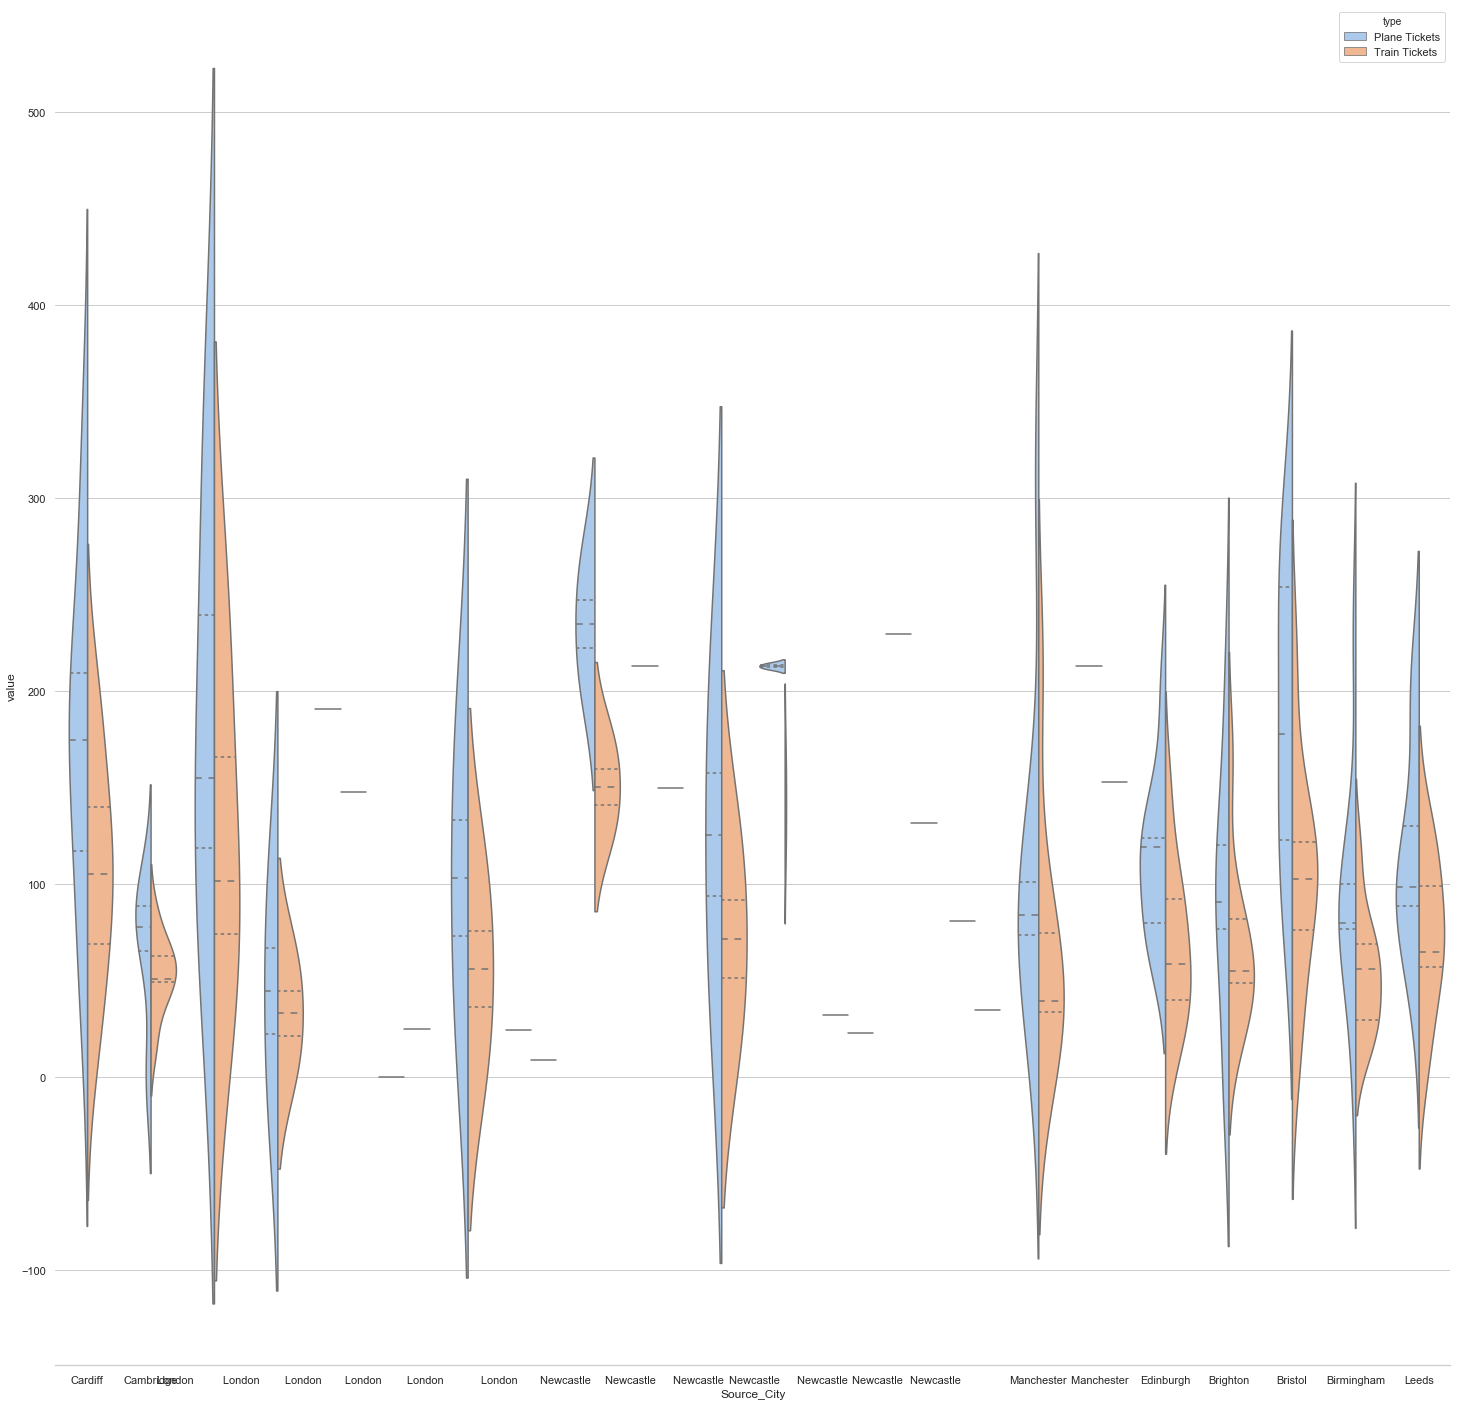

In [17]:
from matplotlib import pyplot 

fig, ax = pyplot.subplots(figsize =(25, 25)) 

sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(ax=ax,x="Source_City", y="value", hue="type",
               split=True, inner="quart",
               data=df1)
sns.despine(left=True)

In [132]:
import numpy as np

labels=list(df['Destination_City'])
parents=list(df['Source_City'])
value=list(df['Plane Tickets'])
for i in range(len(parents)):
    x=parents[i].strip()
    parents[i]='S:' + x
    x=labels[i].strip()
    labels[i]='D:' + x
    
list2=np.array(parents)
list3=np.unique(list2)

for i in range(0,len(list3)):
    parents.insert(0,'City')
    labels.insert(0,list3[i])
    value.insert(0,10)

parents.insert(0,"")
labels.insert(0,'City')
value.insert(0,10)

In [136]:

import plotly.graph_objects as go
fig =go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=value
))
# Update layout for tight margin
fig.update_layout(margin = dict(t=10, l=10, r=10, b=10))

fig.show()